# Feminism Prep: EDA, Lexicon Analysis, Sentiment Analysis and Export for modeling

In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
pd.options.display.max_colwidth = 1000
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


mypath='./data/mensrights/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

myotherpath='./data/women/'
onlyfiles1 = [f for f in listdir(myotherpath) if isfile(join(myotherpath, f))]

print(f"These are the files in mensrights:\n{onlyfiles}\
\n\n\nThese are the files in Femenism:\n{onlyfiles1}")

These are the files in mensrights:
['use1.csv', 'use10.csv', 'use2.csv', 'use3.csv', 'use4.5.csv', 'use4.csv', 'use6.csv', 'use7.csv', 'use9.csv']


These are the files in Femenism:
['test.csv', 'test11.csv', 'test12.csv', 'test13.csv', 'test2.csv', 'test3.csv', 'test4.csv', 'test5.csv', 'test6.csv', 'test7.csv', 'test8.csv', 'test9.csv']


In [2]:
first='test.csv'
one=pd.read_csv('./data/women/'+first)
one.rename(columns={'body': 'text'},inplace=True)
one.shape

(2000, 3)

In [3]:
second='test2.csv'
two =pd.read_csv('./data/women/'+second)
two.rename(columns={'body': 'text'},inplace=True)
two.shape

(2000, 3)

In [4]:
third='test3.csv'
three=pd.read_csv('./data/women/'+third)
three.rename(columns={'body': 'text'},inplace=True)
three.shape

(2000, 3)

In [5]:
third='test4.csv'
three=pd.read_csv('./data/women/'+third)
three.rename(columns={'body': 'text'},inplace=True)
three.shape

(2000, 3)

In [6]:
fourth='test5.csv'
four=pd.read_csv('./data/women/'+fourth)
four.rename(columns={'body': 'text'},inplace=True)
four.shape

(2000, 3)

In [7]:
fifth='test6.csv'
five =pd.read_csv('./data/women/'+fifth)
five.rename(columns={'body': 'text'},inplace=True)
five.shape

(2000, 3)

In [8]:
sixth='test7.csv'
six =pd.read_csv('./data/women/'+sixth)
six.rename(columns={'body': 'text'},inplace=True)
six.shape

(2000, 3)

In [9]:
seventh='test8.csv'
seven =pd.read_csv('./data/women/'+seventh)
seven.rename(columns={'selftext': 'text'},inplace=True)
seven.shape

(2000, 3)

In [10]:
eighth='test9.csv'
eight =pd.read_csv('./data/women/'+eighth)
eight.rename(columns={'selftext': 'text'},inplace=True)
eight.shape

(2000, 3)

In [11]:
ninth='test11.csv'
nine =pd.read_csv('./data/women/'+ninth)
nine.rename(columns={'body': 'text'},inplace=True)
nine['subreddit']=nine.subreddit.str.replace(r'AskFeminists','Feminism',regex=True)
nine.shape

(2000, 3)

In [12]:
tenth='test12.csv'
ten =pd.read_csv('./data/women/'+tenth)
ten.rename(columns={'body': 'text'},inplace=True)
ten['subreddit']=ten.subreddit.str.replace(r'AskFeminists','Feminism',regex=True)
ten.shape

(2000, 3)

In [13]:
eleventh='test13.csv'
eleven =pd.read_csv('./data/women/'+eleventh)
eleven.rename(columns={'body': 'text'},inplace=True)
eleven['subreddit']=eleven.subreddit.str.replace(r'AskFeminists','Feminism',regex=True)
eleven.shape

(2000, 3)

In [14]:
comb=pd.concat([one, two, three,four,five,six,seven,eight,nine,ten,eleven])

# Data Prep and EDA

In [15]:
comb.dropna(inplace=True)

In [16]:
comb.shape

(19891, 3)

In [17]:
comb.replace('/(\r\n)+|\r+|\n+|\t+/', ' ', regex=True, inplace=True)
#kill the line brreaks and tabs
comb.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', regex=True, inplace=True)
#The structure of the links is not like html href it looks more like markdown
comb['text'] = comb.text.str.replace(r'[^a-zA-Z ]\s?','&',regex=True)
#Since we are looking to tokenize words we will remove all special charecters and digits
#Removes the protocol for links and also some of the ending
comb['text'] = comb.text.str.replace(r'&',' ',regex=True)
#Removes the space holder to a white space
comb['text'].replace(' ', np.nan, inplace=True)
#Turns anything that is just white space to a numpy NAN 

In [18]:
comb['text'] = comb.text.str.replace(r' removed','&',regex=True)
comb['text'] = comb.text.str.replace(r' deleted','&',regex=True)
#The posts removed and deleted much like the URLs are pesky and require extra attention
comb['text'] = comb.text.str.replace(r'&','',regex=True)
comb['text'].replace(' ', np.nan, inplace=True)
#Turn them to NANs so we can drop them quickly
comb['text'].replace('amp','', inplace=True)
#kills the amps

In [19]:
comb.dropna(inplace=True)
#will get rid of the rest
comb.shape

(10316, 3)

In [20]:
from sklearn.feature_extraction import text
#bring it in set up a list and union it with the library defaults
extra_stop_words=['just','like','don','people','think','know','want','gt','say','make','really','good','right','said','ve','time','need','way','doesn','did','post','life','rights','point','things','view','actually','yes','poll','didn','ll','feel','day','mean']
stop_words = text.ENGLISH_STOP_WORDS.union(extra_stop_words)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cvec = CountVectorizer(stop_words=stop_words)#stop words included...This has to be reapplied to all models
X = comb.text
cvec.fit(X)
text_cv = cvec.transform(comb.text)
text_df = pd.DataFrame(text_cv.todense(), columns=cvec.get_feature_names())
text_df#lets take a look at the df

,aacknowledged,abandon,abandoned,abandoning,abby,abhorrent,abide,abilities,ability,able,...,zero,zimbalist,zines,zombies,zone,zoned,zones,zoo,zoologist,zora
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
text_df.sum().sort_values(ascending = False).head(5)# provides the top results

women       5915
men         5873
amp         2231
woman       1204
feminism    1107
dtype: int64

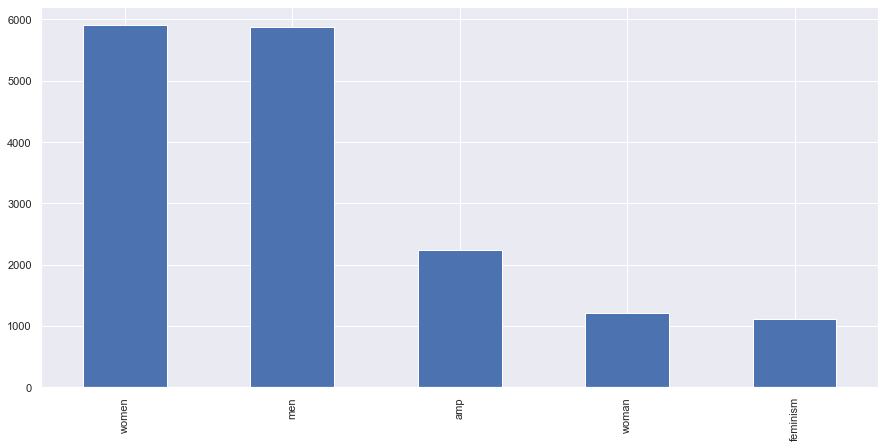

In [23]:
text_df.sum().sort_values(ascending = False).head(5).plot(kind='bar',figsize=(15,7));#visualizes it

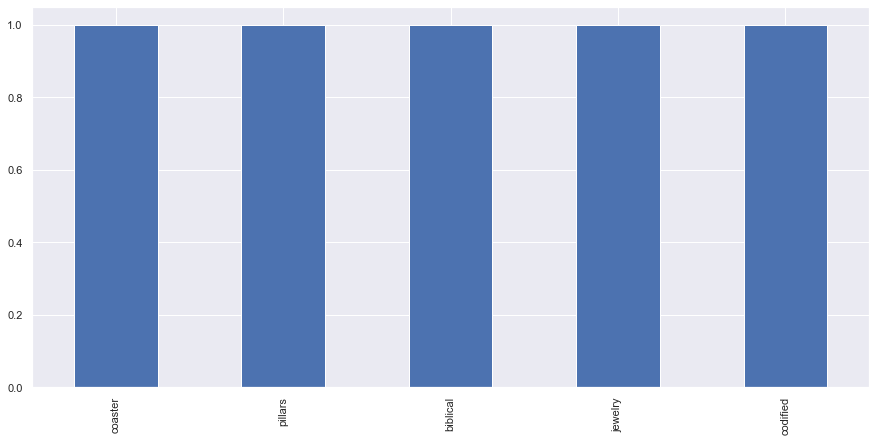

In [24]:
text_df.sum().sort_values(ascending = True).head(5).plot(kind='bar',figsize=(15,7));#now reverse it 

In [25]:
#Try the alternative
tfid = TfidfVectorizer(stop_words=stop_words)
#Add the stop words so that we can get some actual idea of the most prevelent words
X = comb.text
tfid.fit(X)
text_tfid = tfid.transform(comb.text)
#Transform
text_df2 = pd.DataFrame(text_tfid.todense(), columns=tfid.get_feature_names())
text_df2#take a look

,aacknowledged,abandon,abandoned,abandoning,abby,abhorrent,abide,abilities,ability,able,...,zero,zimbalist,zines,zombies,zone,zoned,zones,zoo,zoologist,zora
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


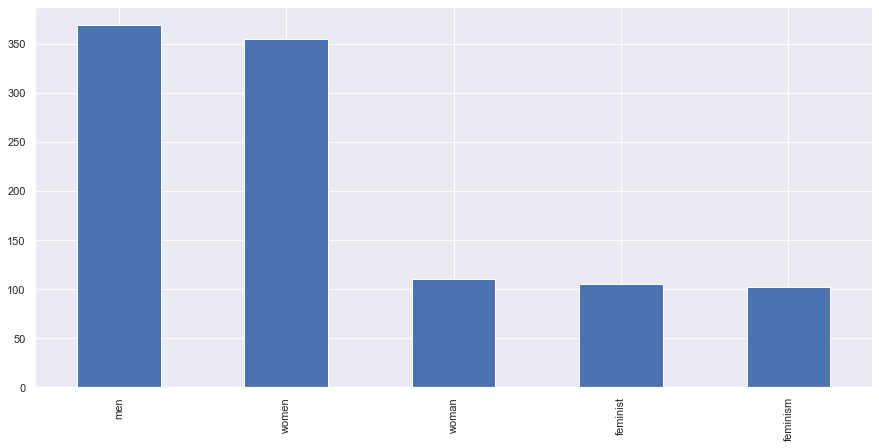

In [26]:
text_df2.sum().sort_values(ascending = False).head(5).plot(kind='bar',figsize=(15,7));#top five terms

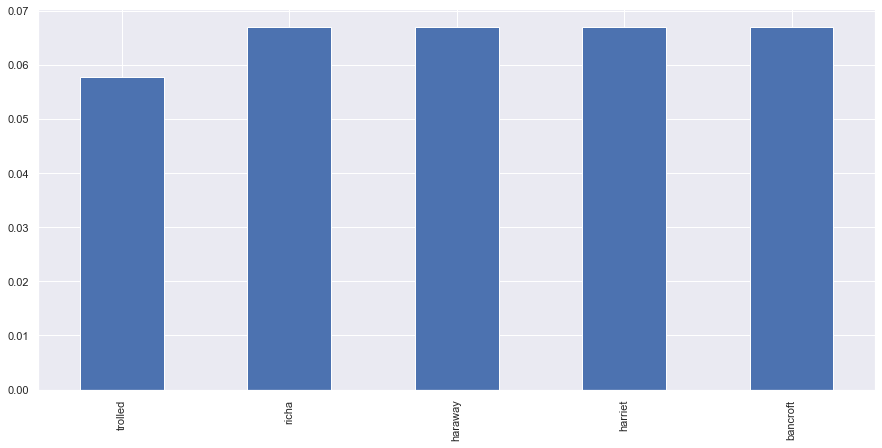

In [27]:
text_df2.sum().sort_values(ascending = True).head(5).plot(kind='bar',figsize=(15,7));#the bottom 5 by frequency

In [28]:
text_df.sum().sort_values(ascending = True).head(15)

coaster        1
pillars        1
biblical       1
jewelry        1
codified       1
apologist      1
jocks          1
joey           1
ship           1
jogging        1
perverted      1
appealed       1
judgy          1
persona        1
persevering    1
dtype: int64

In [29]:
#Create the length and word count columns
comb['length']=comb['text'].str.len()
comb['number_words'] = comb['text'].str.split().str.len()
comb.shape

(10316, 5)

In [30]:
comb = comb[comb['number_words'] > 10]
comb.shape # dump some of the lower count words kind of affraid to push on this any more

(8550, 5)

In [31]:
comb[['subreddit','created_utc','text']].to_csv('./data/z_complete/fem.csv',index=False)
# sends a basic file to a folder for the models

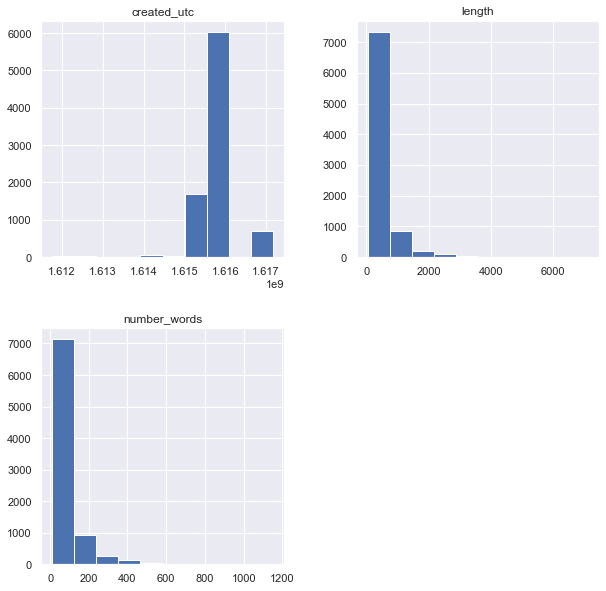

In [32]:
comb.hist(figsize=(10,10));# Seeking meaning where there does not seem to be any

In [33]:
comb.describe()

,created_utc,length,number_words
count,8.550000e+03,8550.000000,8550.000000
mean,1.615726e+09,412.991579,76.742222
std,5.049253e+05,539.517003,97.999179
min,1.611761e+09,41.000000,11.000000
25%,1.615559e+09,121.000000,22.000000
50%,1.615656e+09,225.000000,42.000000
75%,1.615781e+09,486.750000,91.000000
max,1.617165e+09,7119.000000,1151.000000


In [34]:
from textblob import TextBlob

In [35]:
def poles(text):
    try:
        return TextBlob(text).polarity
    except:
        return None
def subj(text):
    try:
        return TextBlob(text).subjectivity
    except:
        return None
#calls in each seperately for direct use alternatively you could get it in a tuple but getting both values in the column is going to be annoying. 
    
    
    
comb['polarity'] = comb['text'].apply(poles)
comb['subjectivity'] = comb['text'].apply(subj)
#done Couldn't be any easier.
comb.head()

,subreddit,text,created_utc,length,number_words,polarity,subjectivity
1,Feminism,As a straight white male ally Atleast in the southern states I can say men do not hold men accountable That s personal experience but I stand by that statement,1615740158,160,30,0.04000,0.160000
2,Feminism,Calling out blaming Yes all men should be called out to do better because we can and we should If you re doing everything you can that s great Keep it up And make sure to hold those around you accountable as well If you re doing everything you can then you shouldn t feel personally attacked by this It s literally as simple as that,1615739896,341,66,0.36000,0.559206
3,Feminism,Yes This tweet and many of the replies are broad brushing men,1615739759,62,12,0.28125,0.406250
8,Feminism,Yes Some of us do This tweet is using a broad brush and I don t think that is helpful to affecting change,1615739588,106,23,0.06250,0.312500
13,Feminism,Just listen When you do hear or notice something speak up And if you don t then just listen,1615737847,92,19,0.00000,0.000000


In [36]:
comb.drop(columns=['subreddit','created_utc','text'],inplace=True)
# drop the others that we do not need any longer

# Let us visualize

I cant compare words one dataset just has double the samples in this one

what it precieves as negative and positive is extremely questionable
Mensrights: polarity:0.049682/ subjectivity:0.463823

Also the surplus of data from one also may play into this




In [43]:
comb.describe()

,length,number_words,polarity,subjectivity
count,8550.000000,8550.000000,8550.000000,8550.000000
mean,412.991579,76.742222,0.073568,0.489847
std,539.517003,97.999179,0.209966,0.216168
min,41.000000,11.000000,-1.000000,0.000000
25%,121.000000,22.000000,-0.025000,0.385937
50%,225.000000,42.000000,0.066667,0.505046
75%,486.750000,91.000000,0.190476,0.621667
max,7119.000000,1151.000000,1.000000,1.000000


In [ ]:
comb.groupby('number_words').size().plot.hist();

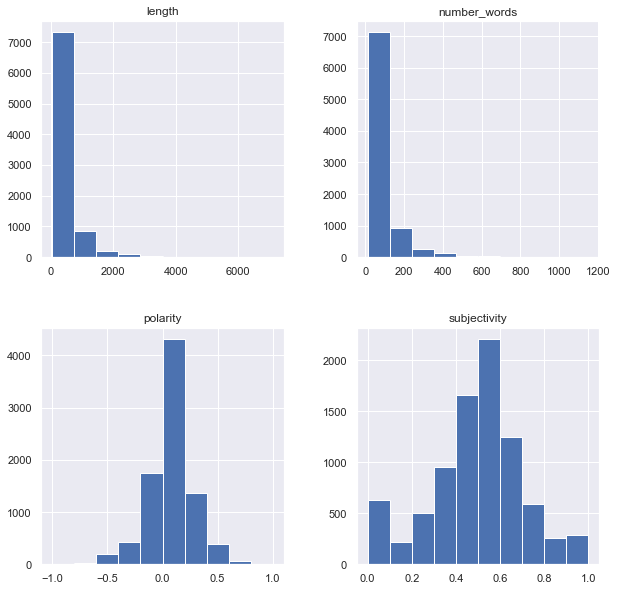

In [38]:
comb.hist(figsize=(10,10));
#the new metrics have a more intersting distribution I think it would pay to focus on them over the word counts 

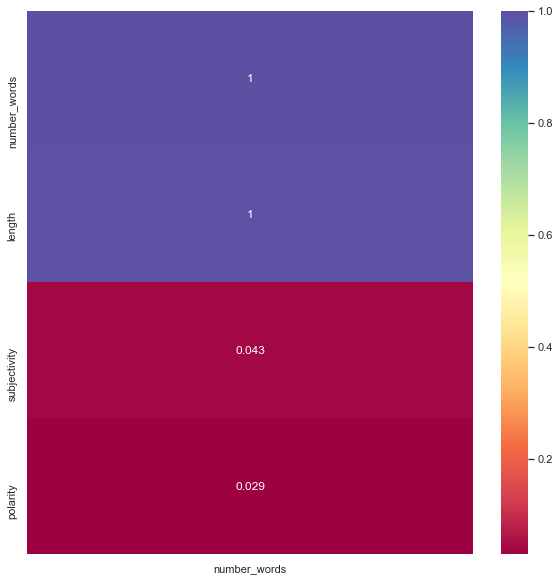

In [39]:
plt.figure(figsize=(10, 10))
plt.fontsize = 32
sns.heatmap(comb.corr()[['number_words']].sort_values('number_words', ascending=False), 
            annot=True, cmap='Spectral', vmax=1);
# the length of words and number of words is not going to really give us insight into the data. 
# We are not interested in the education of the users bc our goal is to gain insight into how we can get 
# This does not make me want to compare them.


Visuals for presentation

Text(0.5, 1.0, "polarity's relationship to subjectivity")

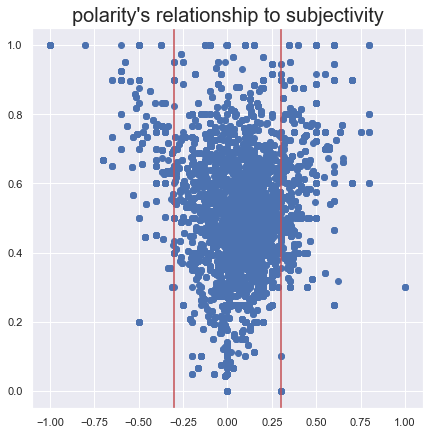

In [40]:
plt.figure(figsize=(7,7));
plt.scatter(x=comb['polarity'], y=comb['subjectivity']);
plt.axvline(-.3, color='r', linestyle='-',label='');
plt.axvline(.3, color='r', linestyle='-',label='');
plt.title("polarity's relationship to subjectivity", fontsize=20)
#The relationship between both meterics are really the same in each

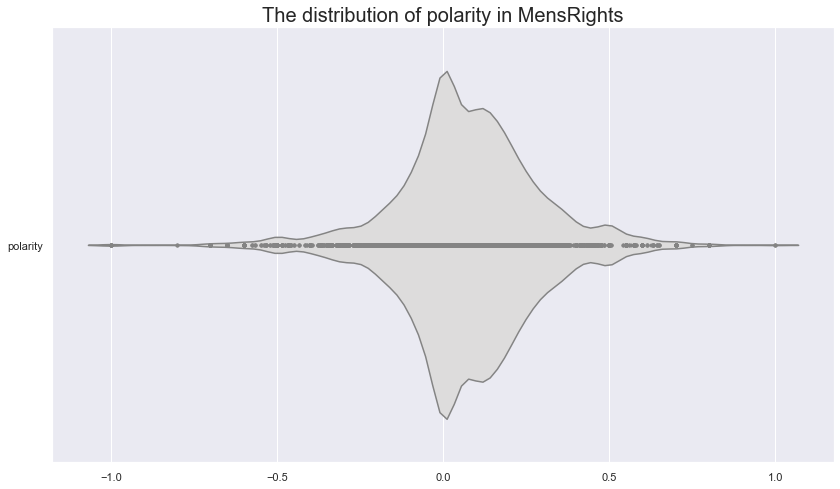

In [41]:
pole=comb[['polarity']]
plt.figure(figsize=(14,8));
sns.violinplot(data=pole, palette="coolwarm", inner="points", orient="h");
plt.title('The distribution of polarity in MensRights', fontsize=20);

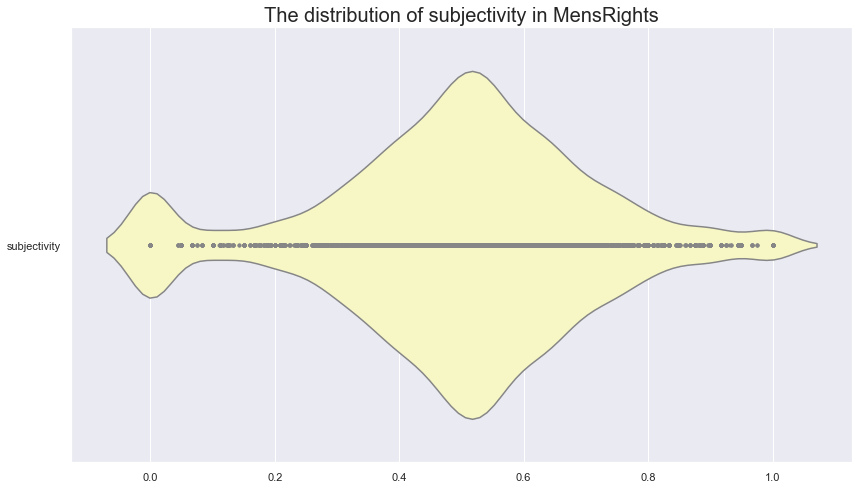

In [42]:
subj=comb[['subjectivity']]
plt.figure(figsize=(14,8));
sns.violinplot(data=subj, palette="Spectral", inner="points", orient="h");
plt.title('The distribution of subjectivity in MensRights', fontsize=20);